In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# TRAIN SET

In [2]:
train = pd.read_csv("../../raw_data/train.csv",index_col="date", parse_dates=True)
train.head()

,metropolitan_area_code,energy_consumption
date,,
2017-09-11 02:15:00,3,477.0
2017-09-11 02:30:00,3,454.0
2017-09-11 03:45:00,3,398.0
2017-09-11 04:45:00,3,398.0
2017-09-11 05:15:00,3,409.0


In [3]:
train.shape

(717414, 2)

In [4]:
train.isna().sum()

metropolitan_area_code    0
energy_consumption        0
dtype: int64

In [5]:
train.describe

<bound method NDFrame.describe of                      metropolitan_area_code  energy_consumption
date                                                           
2017-09-11 02:15:00                       3               477.0
2017-09-11 02:30:00                       3               454.0
2017-09-11 03:45:00                       3               398.0
2017-09-11 04:45:00                       3               398.0
2017-09-11 05:15:00                       3               409.0
...                                     ...                 ...
2021-12-31 16:00:00                       7               383.0
2021-12-31 18:15:00                       7               393.0
2021-12-31 22:30:00                       7               366.0
2021-12-31 23:00:00                       7               351.0
2021-12-31 23:15:00                       7               412.0

[717414 rows x 2 columns]>

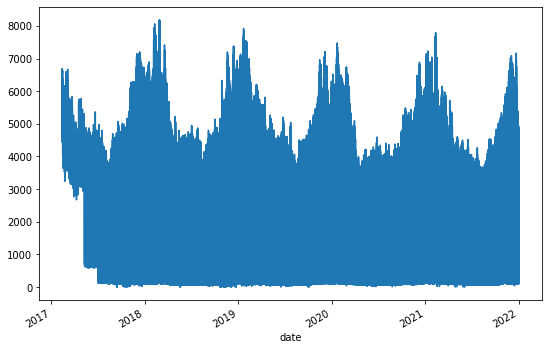

In [6]:
train['energy_consumption'].plot(figsize=(9,6))
plt.show()

<AxesSubplot:>

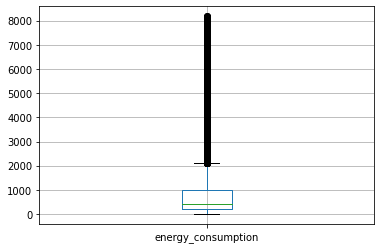

In [7]:
train.boxplot(['energy_consumption'])

In [8]:
train[train["energy_consumption"] > 2000]

,metropolitan_area_code,energy_consumption
date,,
2017-05-15 14:30:00,2,2071.0
2017-05-17 14:00:00,2,2009.0
2017-05-17 14:15:00,2,2017.0
2017-05-19 13:15:00,2,2002.0
2017-06-16 11:45:00,2,2011.0
...,...,...
2021-12-31 21:45:00,0,4213.0
2021-12-31 22:00:00,0,4160.0
2021-12-31 22:30:00,0,4213.0


In [9]:
train.scatterplot()

AttributeError: 'DataFrame' object has no attribute 'scatterplot'

# METEO

In [10]:
meteo = pd.read_csv("../../raw_data/weather_power_nasa.csv",index_col="date", parse_dates=True)
meteo

#T2MWET "The adiabatic saturation temperature which can be measured by a thermometer covered in a water-soaked cloth over which air is passed at 2 meters above the surface of the earth."
#RH2M MERRA-2 Relative Humidity at 2 Meters (%) 
#PRECTOTCORR MERRA-2 Precipitation Corrected (mm/day)

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,metropolitan_area_code
date,,,,,,,
2017-02-13 00:00:00,0.37,0.29,0.33,3.85,99.25,0.0,0
2017-02-13 01:00:00,-0.20,-0.42,-0.31,3.66,98.56,0.0,0
2017-02-13 02:00:00,-0.68,-1.02,-0.85,3.48,98.00,0.0,0
2017-02-13 03:00:00,-1.02,-1.41,-1.21,3.42,97.94,0.0,0
2017-02-13 04:00:00,-1.32,-1.72,-1.52,3.30,98.12,0.0,0
...,...,...,...,...,...,...,...
2022-04-30 19:00:00,10.05,7.98,9.01,6.59,87.00,0.0,16
2022-04-30 20:00:00,9.69,8.02,8.85,6.59,89.44,0.0,16
2022-04-30 21:00:00,9.40,7.98,8.69,6.59,91.00,0.0,16


In [11]:
meteo.shape

(776423, 7)

In [12]:
meteo.isna().sum()

T2M                       0
T2MDEW                    0
T2MWET                    0
QV2M                      0
RH2M                      0
PRECTOTCORR               0
metropolitan_area_code    0
dtype: int64

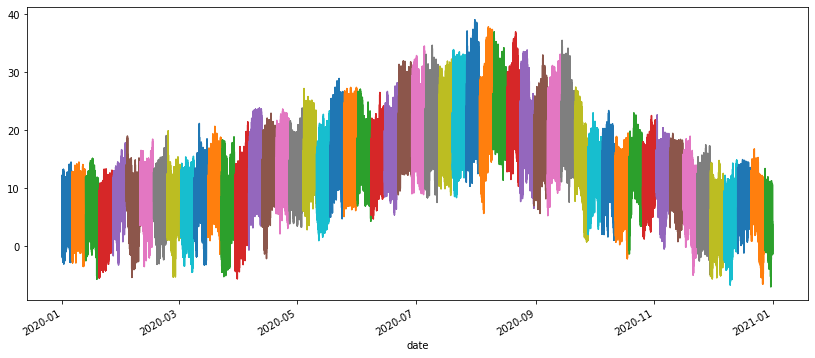

In [13]:
#meteo['T2M'].plot(figsize=(14,6))
meteo.loc['2020','T2M'].resample('W').plot(figsize=(14,6))
plt.show()

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

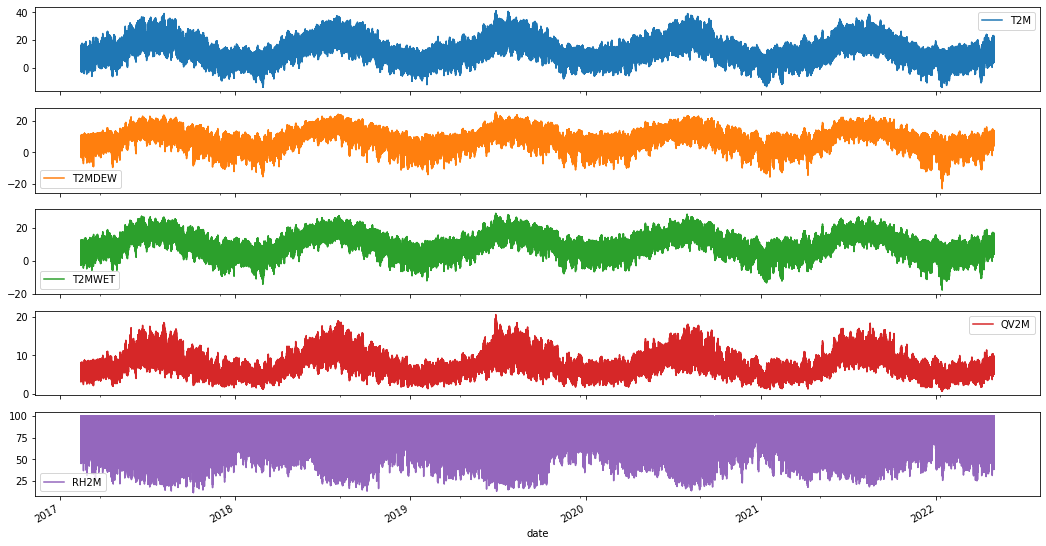

In [14]:
meteo[['T2M','T2MDEW','T2MWET','QV2M', 'RH2M' ]].plot(subplots=True, figsize=(18,10))

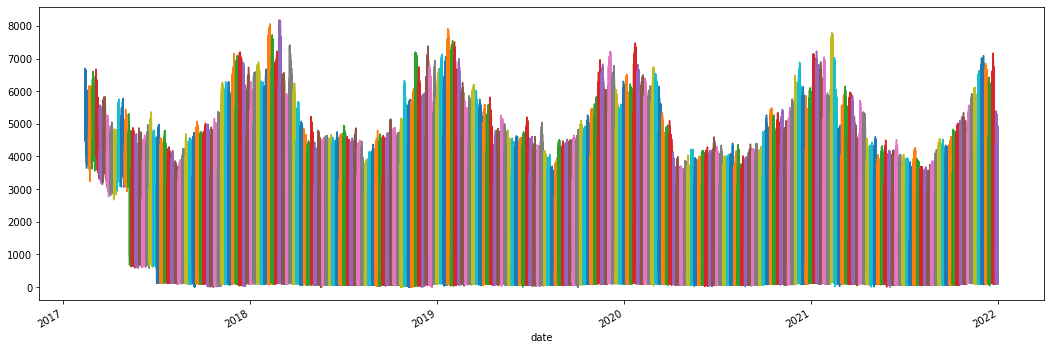

In [15]:
train['energy_consumption'].resample("W").plot(figsize=(18,6))
plt.show()

date
2020-01-01 00:00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-01-01 00:15:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-01-01 00:30:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-01-01 00:45:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-01-01 01:00:00    AxesSubplot(0.125,0.2;0.775x0.68)
                                     ...                
2020-02-29 22:00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-02-29 22:15:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-02-29 22:30:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-02-29 22:45:00    AxesSubplot(0.125,0.2;0.775x0.68)
2020-02-29 23:00:00    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: 15T, Name: T2M, Length: 5757, dtype: object

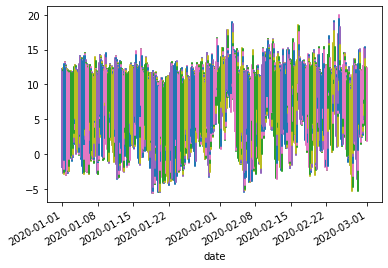

In [16]:
meteo.loc['2020-01 ':'2020-02','T2M'].resample('15T').plot()

date
2022-04-30 10:00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 10:15:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 10:30:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 10:45:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 11:00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 11:15:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 11:30:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 11:45:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 12:00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 12:15:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 12:30:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 12:45:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 13:00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 13:15:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 13:30:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 13:45:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 14:00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2022-04-30 14:15:00    Axe

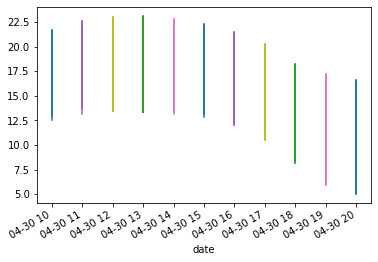

In [17]:
meteo.loc['2022-04-30 10:00:00':'2022-04-30 20:00:00','T2M'].resample('15T').plot()

## Assembler des datasets

In [22]:
train_meteo = pd.merge(train, meteo, on='date', how='inner',suffixes=('_train', '_meteo'))

In [23]:
train_meteo

,metropolitan_area_code_train,energy_consumption,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,metropolitan_area_code_meteo
date,,,,,,,,,
2017-09-11 07:00:00,3,502.0,12.94,10.12,11.52,7.81,82.81,0.02,0
2017-09-11 07:00:00,3,502.0,15.17,10.71,12.94,8.24,74.69,0.05,1
2017-09-11 07:00:00,3,502.0,17.19,7.26,12.23,6.59,52.25,0.00,2
2017-09-11 07:00:00,3,502.0,16.83,12.91,14.87,9.28,77.62,0.02,3
2017-09-11 07:00:00,3,502.0,13.33,11.10,12.22,8.30,86.12,0.18,4
...,...,...,...,...,...,...,...,...,...
2021-12-27 03:00:00,7,362.0,2.80,2.43,2.61,4.82,97.31,0.00,12
2021-12-27 03:00:00,7,362.0,4.15,3.82,3.98,5.31,97.62,0.06,13
2021-12-27 03:00:00,7,362.0,5.21,5.07,5.14,5.68,98.94,0.02,14
